In [1]:
%load_ext blackcellmagic

ModuleNotFoundError: No module named 'blackcellmagic'

In [2]:
from pathlib import Path

import numpy as np 
import scipy
from scipy import interpolate
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from urllib.request import urlopen
import requests
from io import StringIO
%matplotlib inline
%config InlineBackend.figure_format='retina'

from helpers.SimulationAnalysis import readHlist
import pandas as pd

matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['mathtext.rm'] = 'serif'
matplotlib.rcParams["xtick.major.size"] = 11
matplotlib.rcParams["xtick.major.width"] = 1
matplotlib.rcParams["xtick.minor.size"] = 6
matplotlib.rcParams["xtick.minor.width"] = 1
matplotlib.rcParams["ytick.major.size"] = 11
matplotlib.rcParams["ytick.major.width"] = 1
matplotlib.rcParams["ytick.minor.size"] = 6
matplotlib.rcParams["ytick.minor.width"] = 1

In [6]:
#path_arrays_host = Path.home() / "proj_2"
#path_rhapsody = Path.home() / "Documents" / "Research_Halos" / "RhapsodyProfiles2"

In [7]:
#rhapsody_halonames = np.genfromtxt(path_arrays_host / "halo_names.txt",dtype='str')
#rhapsody_host_rvir = np.load(path_arrays_host / "rhapsody_host_rvir.npy")

In [3]:
url_rhap = 'https://www.slac.stanford.edu/~yymao/tmp/mass_histories_rhap.dat'
html_rhap = requests.get(url_rhap)
data_rhap = html_rhap.text
rhapsody = pd.read_csv(StringIO(data_rhap), 
                 sep="\s+", #separator whitespace
                 header=0,
                 index_col=0,
                 )
rhapsody_names = np.array(rhapsody.columns)
rhapsody_times = []
for i in range(len(rhapsody_names)):
    rhapsody_time = [x.strip('mvir_') for x in rhapsody_names[i].split('_')][1]
    rhapsody_times.append(rhapsody_time)
rhapsody_times = np.array(rhapsody_times).astype('float')
rhapsody_times /= 10000

In [6]:
rhapsody_halfmass_scale = []
for index, row in rhapsody.iterrows():
    #calculate the half mass based on the final mass
    final_mass = row[-1]
    half_mass = .8*final_mass
    #find first instance with more than half the mass
    gtr = np.where(row > half_mass)[0][0]
    #Construct interpolator to find exact time of half mass
    x_points = np.array([row[gtr],row[gtr-1]])
    y_points = np.array([rhapsody_times[gtr],rhapsody_times[gtr-1]])
    f = scipy.interpolate.interp1d(x_points,y_points)
    rhapsody_halfmass_scale.append(f(half_mass))

In [11]:
url_mw = 'https://www.slac.stanford.edu/~yymao/tmp/mass_histories.dat'
html_mw = requests.get(url_mw)
data_mw = html_mw.text
milkyway = pd.read_csv(StringIO(data_mw), 
                 sep="\s+", #separator whitespace
                 header=0,
                 index_col=0,
                 )
mw_names = np.array(milkyway.columns)
mw_times = []
for i in range(len(mw_names)):
    mw_time = [x.strip('mvir_') for x in mw_names[i].split('_')][1]
    mw_times.append(mw_time)
mw_times = np.array(mw_times).astype('float')
mw_times /= 10000

ParserError: Error tokenizing data. C error: Expected 4 fields in line 6, saw 7


In [ ]:
mw_halfmass_scale = []
for index, row in milkyway.iterrows():
    #calculate the half mass based on the final mass
    final_mass = row[-1]
    half_mass = 0.01*final_mass
    #find first instance with more than half the mass
    gtr = np.where(row > half_mass)[0][0]
    #Construct interpolator to find exact time of half mass
    x_points = np.array([row[gtr],row[gtr-1]])
    y_points = np.array([mw_times[gtr],mw_times[gtr-1]])
    f = scipy.interpolate.interp1d(x_points,y_points)
    mw_halfmass_scale.append(f(half_mass))

NameError: name 'mw_halfmass_scale' is not defined

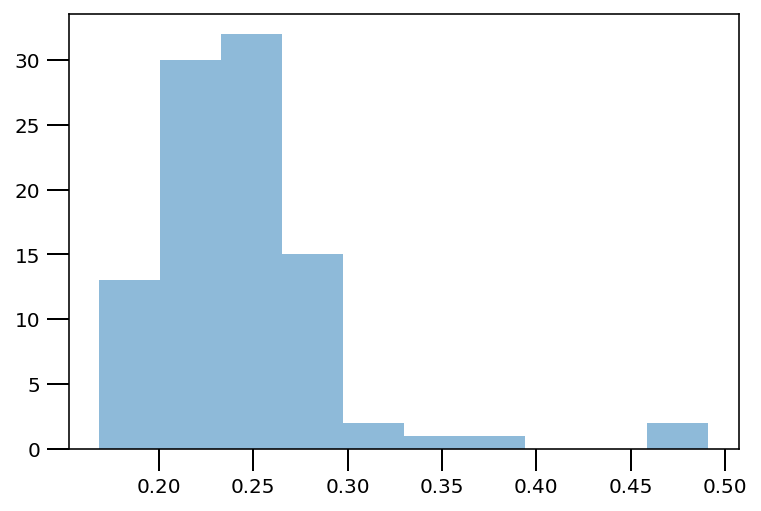

In [13]:
plt.hist(rhapsody_halfmass_scale,label='Rhapsody',alpha=0.5)
plt.hist(mw_halfmass_scale,label='MMMZ',alpha=0.5)
plt.legend()

In [7]:
np.save('rhapsody_80mass_scale',rhapsody_halfmass_scale)
#np.save('mw_01mass_scale',mw_halfmass_scale)